# 逻辑回归

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import math

In [2]:
pddata = pd.read_csv('data2.csv',header = None, names = ['x' + str(i) for i in range(1,9)] + ['y'])
pddata

,x1,x2,x3,x4,x5,x6,x7,x8,y
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.340,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [3]:
pddata.insert(0, 'x0', 1)
pddata

,x0,x1,x2,x3,x4,x5,x6,x7,x8,y
1,1,6,148,72,35,0,33.6,0.627,50,1
2,1,1,85,66,29,0,26.6,0.351,31,0
3,1,8,183,64,0,0,23.3,0.672,32,1
4,1,1,89,66,23,94,28.1,0.167,21,0
5,1,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
764,1,10,101,76,48,180,32.9,0.171,63,0
765,1,2,122,70,27,0,36.8,0.340,27,0
766,1,5,121,72,23,112,26.2,0.245,30,0
767,1,1,126,60,0,0,30.1,0.349,47,1


In [4]:
pdvalues = pddata.values #转换成numpy形式便于进行矩阵运算
pdvalues

array([[  1.   ,   6.   , 148.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,   1.   ,  85.   , ...,   0.351,  31.   ,   0.   ],
       [  1.   ,   8.   , 183.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  1.   ,   5.   , 121.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   ,   1.   , 126.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,   1.   ,  93.   , ...,   0.315,  23.   ,   0.   ]])

In [5]:
def pltshow(X, Y, points = 2, cate = 1):
    c1 = ['b', 'r', 'y', 'g']
    marker1 = ['x', 'o', 'x', 'o']
    label = ['one', 'two', 'three', 'four']
    fig, ax = plt.subplots(figsize = (10, 5))
    if cate == 1:
        for i in range(points):
            positive = X[Y == i]
            ax.scatter(positive[:, 0], positive[:, 1], s = 30, c = c1[i], marker = marker1[i], label = label[i])
    elif cate == 2:
        ax.scatter(X, Y, s = 30)
    else:
        ax.plot(X, Y, c = 'b', label = 'pass')
        
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.show()

In [6]:
cols = pdvalues.shape[1]
X = pdvalues[:, 0:cols - 1]
Y = pdvalues[:, cols - 1]
shape = pdvalues.shape
shape
print(cols)

10


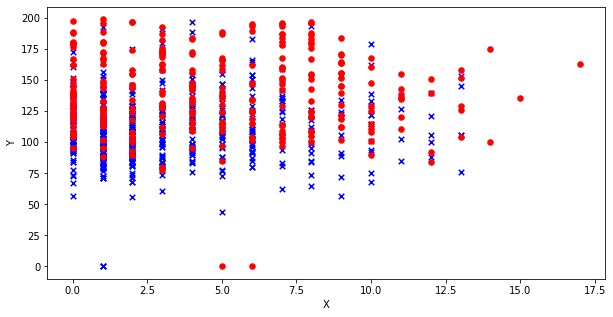

In [7]:
pltshow(pdvalues[:,1:3], Y, points = 2, cate = 1)

In [8]:
theta = np.zeros(cols - 1)
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
def sigmoid(x):
    x_ravel = x.ravel()  # 将numpy数组展平
    length = len(x_ravel)
    y = []
    for index in range(length):
        if x_ravel[index] >= 0:
            y.append(1.0 / (1 + np.exp(-x_ravel[index])))
        else:
            y.append(np.exp(x_ravel[index]) / (np.exp(x_ravel[index]) + 1))
    return np.array(y).reshape(x.shape)

In [10]:
def model(X, theta):
    return sigmoid(np.dot(X, theta.T))

# 初始化

In [11]:
#损失函数
def loss(Xc, Yc, theta):
    xlen = Xc.shape[0]
    left = np.multiply((Yc - 1),np.log(1 - model(Xc,theta) + 1e-5))
    right = np.multiply(Yc, np.log(model(Xc,theta)))
    cost = np.sum(left-right)/xlen
    return cost

In [12]:
#梯度计算
def gradient(Xn, Yn, theta):
    xshape0 = Xn.shape[0]
    xshape1 = Xn.shape[1]
    grad = np.zeros(xshape1)
    chazhi = model(Xn, theta) - Yn #h（theta）-y
    for j in range(xshape1):
        onegrad = np.multiply(chazhi, Xn[:, j])
        onegrad = np.sum(onegrad, axis = 0)/xshape0
        grad[j] = onegrad
    return grad

In [13]:
#打乱数据
def shuffledata(datashuffle):
    np.random.shuffle(datashuffle)
    colsd = datashuffle.shape[1]
    X = datashuffle[:, :colsd - 1]
    Y = datashuffle[:, colsd]
    return X, Y

In [14]:
X = pdvalues[:, 0:cols - 1]
Y = pdvalues[:, cols - 1]
print(X, Y)

[[  1.      6.    148.    ...  33.6     0.627  50.   ]
 [  1.      1.     85.    ...  26.6     0.351  31.   ]
 [  1.      8.    183.    ...  23.3     0.672  32.   ]
 ...
 [  1.      5.    121.    ...  26.2     0.245  30.   ]
 [  1.      1.    126.    ...  30.1     0.349  47.   ]
 [  1.      1.     93.    ...  30.4     0.315  23.   ]] [1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 

In [15]:
#梯度下降训练
def train(pdvalues,theta,celve = 2,xuexilv = 0.001, val = 0.02):
    ticks = time.time()
    X = pdvalues[:, 0:cols - 1]
    Y = pdvalues[:, cols - 1]
    Y1 = Y.copy()
    i = 0
    grad = gradient(X, Y, theta)
    costnp = []
    
    tg = []
    tg1 = []
    tg1.append(theta[1])
    tg1.append(grad[1])
    tg.append(tg1)
    
    while True:
        
        theta = theta - xuexilv * grad
        grad = gradient(X, Y, theta)
        
        i = i + 1
        if i < 15000:
            tg1 = []
            tg1.append(theta[1])
            tg1.append(grad[1])
            tg.append(tg1)
        if i % 2000 == 0:
            cost1 = loss(X, Y, theta)
            cost2 = []
            cost2.append(i)
            cost2.append(cost1)
            costnp.append(cost2)
            
        if celve == 1:
            if i > val:
                break
        elif celve == 2:
            if np.linalg.norm(grad) < val:
                break
        else:
            pass
    costnp = np.array(costnp)
    tgnp = np.array(tg)
    
    print('loss:', loss(X, Y, theta))
    
    Y = np.dot(X, theta.T)
    for k,i in enumerate(Y):
        if i > 0:
            Y[k] = 1
        else:
            Y[k] = 0
            
    #算后散点图
    pltshow(X[:, 1:3], Y, points = 2)
    shapeY = Y.shape[0]
    #正确率
    correct = []
    for k, i in enumerate(Y):
        if i == Y1[k]:
            correct.append(1)
        else:
            if i == 0:
                Y[k] = 3
            else:
                Y[k] = 2
    accuracy = len(correct)/shapeY
    
#     print(X[0:20])
#     print(Y[0:20])
#     exit()

    pltshow(X[:, 1:3],Y, points = 4)
    pltshow(costnp[:, 0], costnp[:, 1], '', cate = 3)
    pltshow(tgnp[:, 0], tgnp[:, 1],'', cate = 3)
    pltshow(tgnp[:, 0], tgnp[:, 1], points = 1, cate = 2)
    
    print('范数：', np.linalg.norm(grad))
    print('theta', theta)
    print('grad:',grad)
    print('准确率：',accuracy)
    ticks1 = time.time()
    yunxingshijian = ticks1 - ticks
    print('运行时间：',yunxingshijian)

原图


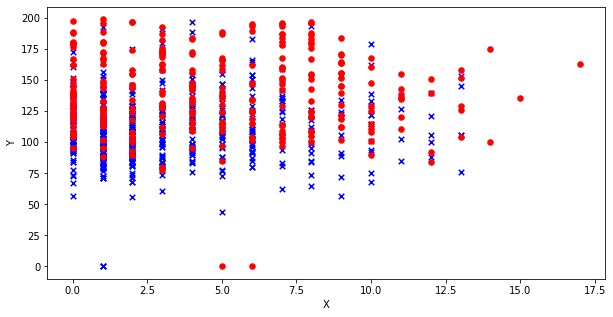

训练后图
loss: 35.18442335205241


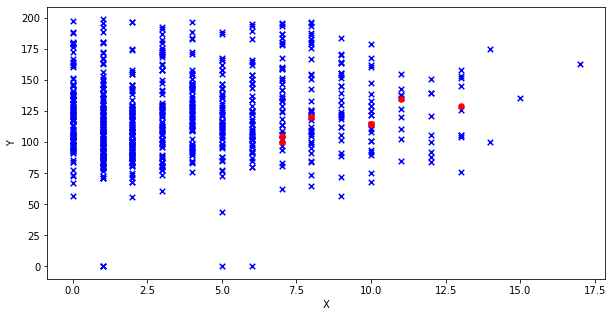

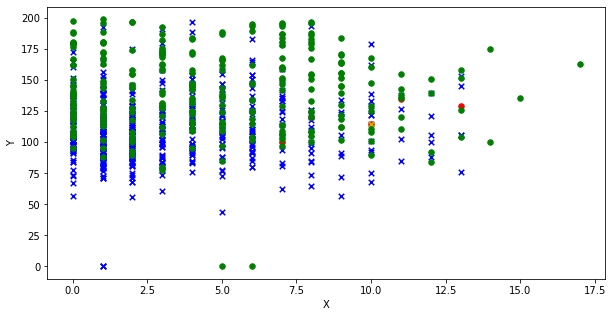

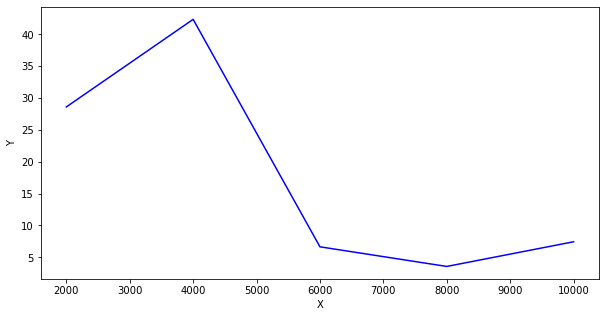

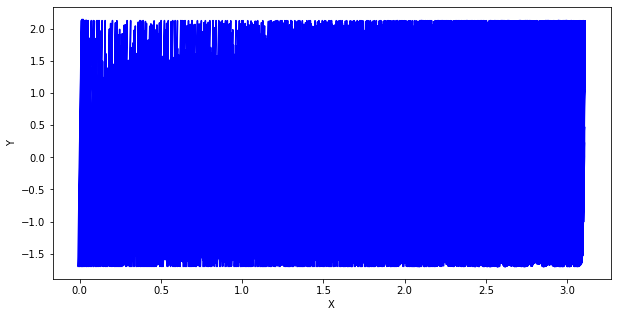

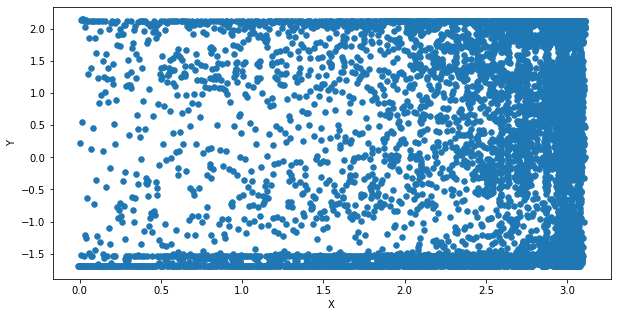

范数： 67.25328001308924
theta [-3.39578748  3.05797761 -0.06012345 -0.99653334 -0.08268993 -0.18910928
  0.03889653  0.79639576 -0.37931786]
grad: [ -0.33925726  -1.60948425 -48.17665787 -24.71484375  -7.69531276
 -35.01302083 -12.01006202  -0.18866099 -12.61259778]
准确率： 0.6549479166666666
运行时间： 24.336267948150635


In [23]:
print('原图')
pltshow(pdvalues[:,1:3], Y, points = 2, cate = 1)
print('训练后图')
train(pdvalues, theta,celve = 1, xuexilv = 0.01, val = 10000)

原图


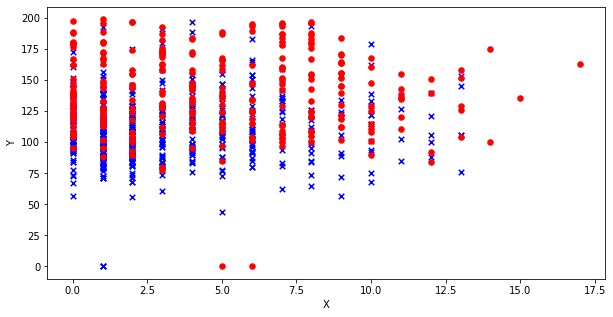

训练后图
loss: 2.6421261429366614


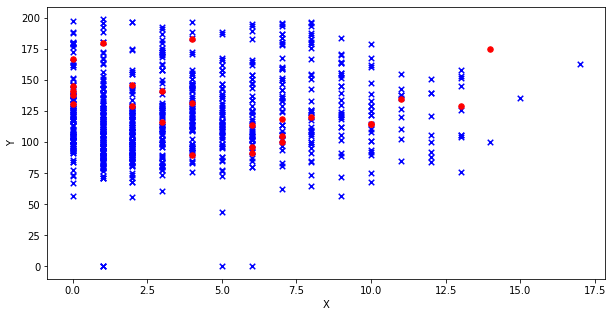

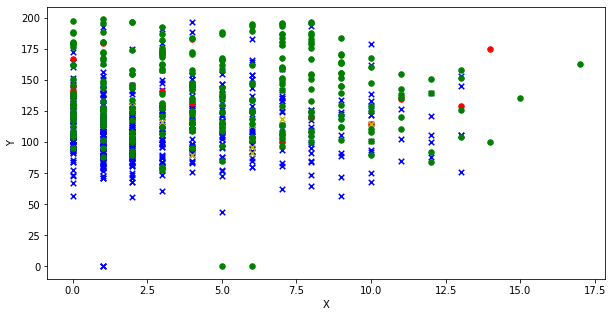

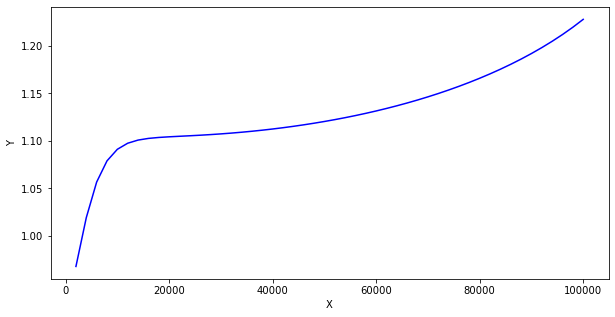

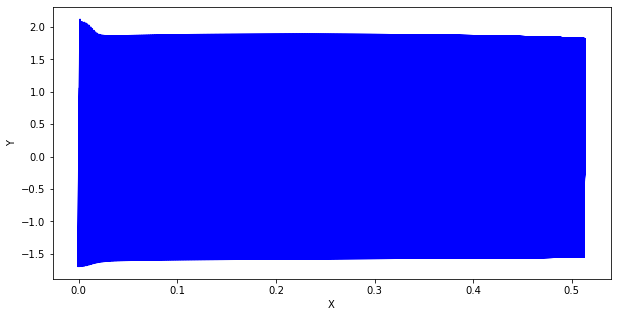

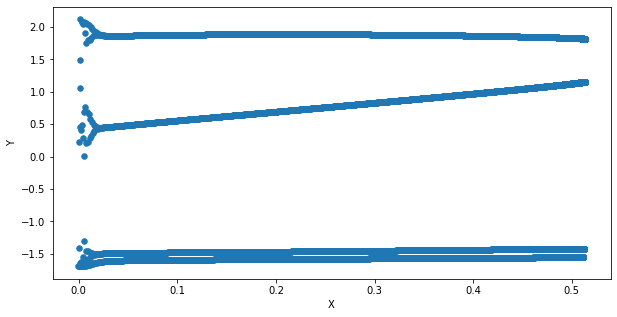

范数： 64.15410345930822
theta [-3.41403248e+00  5.12586617e-01  3.12094482e-02 -1.01501600e-01
 -3.15876666e-03 -2.46829571e-02  1.37088223e-02  7.11785319e-01
 -5.27094629e-02]
grad: [ -0.31183836  -1.48785456 -44.54595275 -24.22410265  -7.57652284
 -34.94916159 -11.20494709  -0.177198   -11.74134355]
准确率： 0.66015625
运行时间： 217.38063287734985


In [20]:
print('原图')
pltshow(pdvalues[:,1:3], Y, points = 2, cate = 1)
print('训练后图')
train(pdvalues, theta,celve = 1, xuexilv = 0.001, val = 100000)